In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy_nn as nn

In [3]:
dataset = sns.load_dataset("iris")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
train_data = dataset.sample(frac=.8, random_state=42)
test_data = dataset.drop(train_data.index)

print(f'Training set size: {len(train_data)}')
print(f'Test set size: {len(test_data)}')

Training set size: 120
Test set size: 30


In [5]:
TARGET_NAME = "species"
NUM_VARIABLES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [7]:
test_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
37,4.9,3.6,1.4,0.1,setosa


In [8]:
target_classes_train = np.sort(train_data[TARGET_NAME].unique())
target_classes_test = np.sort(test_data[TARGET_NAME].unique())
target_classes_train

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
target_classes_test

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
train_data[TARGET_NAME] = train_data[TARGET_NAME].replace(target_classes_train, np.arange(target_classes_train.size))
test_data[TARGET_NAME] = test_data[TARGET_NAME].replace(target_classes_test, np.arange(target_classes_test.size))
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [11]:
train_ds = nn.data.Dataset(train_data, TARGET_NAME, [], NUM_VARIABLES)
test_ds = nn.data.Dataset(test_data, TARGET_NAME, [], NUM_VARIABLES)

In [12]:
model = nn.models.Sequential([
    nn.layers.core.Input((1, train_ds.num_of_features())),
    nn.layers.core.Dense(30, activation='relu'),
    nn.layers.core.Dense(3, activation='softmax')
])

In [13]:
model.compile(optimizer=nn.optimizers.SGD(lr=0.01, momentum=0.9),
              loss=nn.losses.CategoricalCrossEntropy(),
              metrics=['accuracy'])

In [14]:
train_ds.batch(16)

In [15]:
history = model.fit(train_ds,
          epochs=250)

Epoch 1/250:
0.083s - accuracy: 0.305 - loss: 1.125
Epoch 2/250:
0.011s - accuracy: 0.328 - loss: 1.108
Epoch 3/250:
0.009s - accuracy: 0.328 - loss: 1.094
Epoch 4/250:
0.009s - accuracy: 0.312 - loss: 1.079
Epoch 5/250:
0.005s - accuracy: 0.336 - loss: 1.059
Epoch 6/250:
0.005s - accuracy: 0.359 - loss: 1.045
Epoch 7/250:
0.005s - accuracy: 0.477 - loss: 1.029
Epoch 8/250:
0.005s - accuracy: 0.594 - loss: 1.016
Epoch 9/250:
0.005s - accuracy: 0.680 - loss: 1.000
Epoch 10/250:
0.010s - accuracy: 0.703 - loss: 0.984
Epoch 11/250:
0.007s - accuracy: 0.812 - loss: 0.972
Epoch 12/250:
0.002s - accuracy: 0.859 - loss: 0.955
Epoch 13/250:
0.007s - accuracy: 0.914 - loss: 0.936
Epoch 14/250:
0.004s - accuracy: 0.953 - loss: 0.924
Epoch 15/250:
0.002s - accuracy: 0.961 - loss: 0.907
Epoch 16/250:
0.002s - accuracy: 0.953 - loss: 0.886
Epoch 17/250:
0.003s - accuracy: 0.906 - loss: 0.874
Epoch 18/250:
0.002s - accuracy: 0.883 - loss: 0.862
Epoch 19/250:
0.002s - accuracy: 0.883 - loss: 0.839
Ep

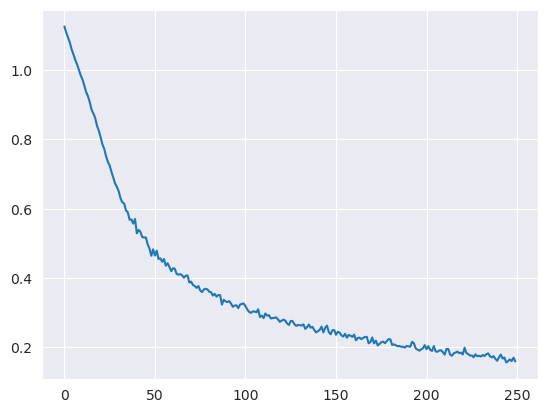

In [16]:
plt.plot(history.epochs, history.history['loss'])

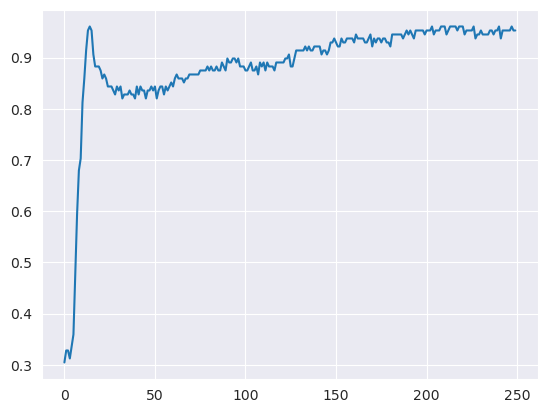

In [17]:
plt.plot(history.epochs, history.history['accuracy'])

In [18]:
y_pred = model.predict(test_ds.dataset.T)
y_true = test_ds.target.T
accuracy = nn.accuracy(y_true, y_pred)

print(f'Test set accuracy: {accuracy:.0%}')

Test set accuracy: 93%


In [19]:
np.argmax(y_pred, axis=0)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1])

In [20]:
np.argmax(y_true, axis=0)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])